# Week4 授業前課題1 アヤメの分類

## アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

## 分類問題の流れ
まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を **2値分類** と呼び、それ以上の **多値分類** とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

## 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

**《実際の問題では？》**

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
iris_data.keys(), iris_data.target_names, iris_data.feature_names

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [2]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_X = pd.DataFrame(iris_data.data, columns=feature_names)
df_y = pd.DataFrame(iris_data.target, columns=['Species'])
df = pd.concat([df_X, df_y], axis=1)
df['Species_name'] = iris_data.target_names[df['Species']]
df

,sepal_length,sepal_width,petal_length,petal_width,Species,Species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
# Speicies virgicolorとvirginica(1と2)を選択
# 特徴量　sepal_lengthとpetal_lengthを選択
X_choice = ['sepal_length', 'petal_length', 'Species', 'Species_name']
y_choice = 'Species == 1 | Species == 2'
df_choice = df.query(y_choice)[X_choice]
df_choice

,sepal_length,petal_length,Species,Species_name
50,7.0,4.7,1,versicolor
51,6.4,4.5,1,versicolor
52,6.9,4.9,1,versicolor
53,5.5,4.0,1,versicolor
54,6.5,4.6,1,versicolor
...,...,...,...,...
145,6.7,5.2,2,virginica
146,6.3,5.0,2,virginica
147,6.5,5.2,2,virginica
148,6.2,5.4,2,virginica


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

**《実際の問題では？》**

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

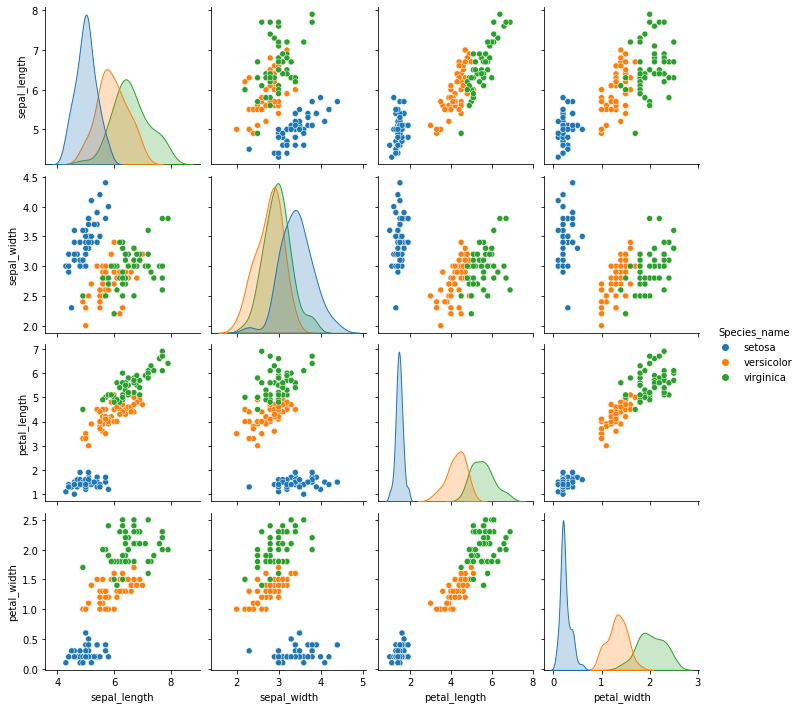

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df, hue='Species_name', vars=feature_names);

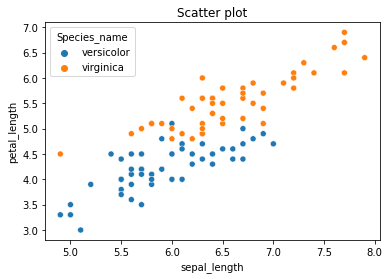

In [5]:
#散布図
sns.scatterplot(data=df_choice, x='sepal_length', y='petal_length', hue='Species_name')
plt.title('Scatter plot');

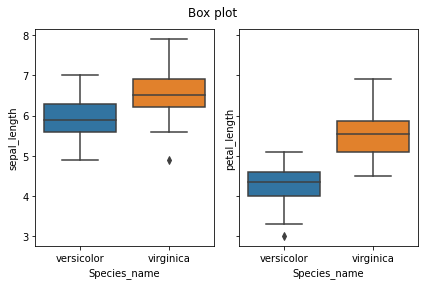

In [6]:
#箱ひげ図
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df_choice, x='Species_name', y='sepal_length', ax=ax1)
sns.boxplot(data=df_choice, x='Species_name', y='petal_length', ax=ax2)
plt.tight_layout()
fig.suptitle('Box plot')
plt.subplots_adjust(top=0.9);

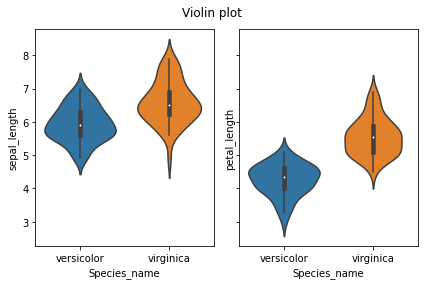

In [7]:
#バイオリン図
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.violinplot(data=df_choice, x='Species_name', y='sepal_length', ax=ax1)
sns.violinplot(data=df_choice, x='Species_name', y='petal_length', ax=ax2)
plt.tight_layout()
fig.suptitle('Violin plot')
plt.subplots_adjust(top=0.9);

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnの`train_test_split`が利用できます。公式ドキュメントのExamplesを参考に動かしてください。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**《注意点》**

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

**《分割する理由》**

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df_choice.iloc[:, 0:2].values
y = df_choice.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
X_train[:5], y_train[:5]

(array([[5.1, 3. ],
        [6.3, 4.7],
        [5.9, 5.1],
        [6.4, 5.6],
        [6.2, 4.8]]),
 array([1, 1, 2, 2, 2]))

## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

[sklearn.preprocessing.StandardScaler — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**《注意点》**

標準化は訓練用のデータで`fit`を行い、訓練用、検証用双方のデータに`transform`を行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

**《実際の問題での前処理は？》**

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_scaler[:5], X_test_scaler[:5]

StandardScaler()


(array([[-1.77029021, -2.29778941],
        [ 0.03817879, -0.24187257],
        [-0.56464421,  0.24187257],
        [ 0.18888454,  0.84655399],
        [-0.11252696, -0.12093628]]),
 array([[ 7.91707539e-01, -1.20936285e-01],
        [ 3.81787899e-02,  8.46553995e-01],
        [ 9.42413289e-01,  2.14825997e-15],
        [ 1.99735354e+00,  2.05591684e+00],
        [ 1.39453054e+00,  1.33029913e+00]]))

標準化は以下のように各データ xi から平均 μ を引き，その値を標準偏差 σ で割ることで達成される
\begin{eqnarray*}z_i=\frac{x_i-\mu}{\sigma}\end{eqnarray*}

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証データを`predict`メソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、`n_neighbors`の数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を`5-nn`、3の場合を`3-nn`のように呼びます。

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors=5
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_scaler, y_train)
y_pred_5 = neigh_5.predict(X_test_scaler)
y_pred_5

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [11]:
# n_neighbors=4
neigh_4 = KNeighborsClassifier(n_neighbors=4)
neigh_4.fit(X_train_scaler, y_train)
y_pred_4 = neigh_4.predict(X_test_scaler)
y_pred_4

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [12]:
# n_neighbors=3
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_scaler, y_train)
y_pred_3 = neigh_3.predict(X_test_scaler)
y_pred_3

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [13]:
# n_neighbors=2
neigh_2 = KNeighborsClassifier(n_neighbors=2)
neigh_2.fit(X_train_scaler, y_train)
y_pred_2 = neigh_2.predict(X_test_scaler)
y_pred_2

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [14]:
# n_neighbors=1
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train_scaler, y_train)
y_pred_1 = neigh_1.predict(X_test_scaler)
y_pred_1

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には **Accuracy（正解率）**、**Precision（適合率）**、**Recall（再現率）**、**F値** があります。それぞれの意味を理解するには、 **混同行列（confusion matrix）** を見ることになります。

- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

[sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

[sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

[sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

[sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [15]:
# scikit-learnを使い4種類の指標を計算する
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_lst = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]
for i, y_pred in enumerate(y_pred_lst, 1):
    print('n_neighbors = {}   Accracy = {}'.format(i, accuracy_score(y_test, y_pred)))

n_neighbors = 1   Accracy = 0.84
n_neighbors = 2   Accracy = 0.88
n_neighbors = 3   Accracy = 0.92
n_neighbors = 4   Accracy = 0.92
n_neighbors = 5   Accracy = 0.88


In [16]:
for i, y_pred in enumerate(y_pred_lst, 1):
    print('n_neighbors = {}   Precision = {}'.format(i, precision_score(y_test, y_pred)))

n_neighbors = 1   Precision = 0.9090909090909091
n_neighbors = 2   Precision = 0.9166666666666666
n_neighbors = 3   Precision = 1.0
n_neighbors = 4   Precision = 1.0
n_neighbors = 5   Precision = 1.0


In [17]:
for i, y_pred in enumerate(y_pred_lst, 1):
    print('n_neighbors = {}   Recall = {}'.format(i, recall_score(y_test, y_pred)))

n_neighbors = 1   Recall = 0.7692307692307693
n_neighbors = 2   Recall = 0.8461538461538461
n_neighbors = 3   Recall = 0.8461538461538461
n_neighbors = 4   Recall = 0.8461538461538461
n_neighbors = 5   Recall = 0.7692307692307693


In [18]:
for i, y_pred in enumerate(y_pred_lst, 1):
    print('n_neighbors = {}   F値 = {}'.format(i, f1_score(y_test, y_pred)))

n_neighbors = 1   F値 = 0.8333333333333333
n_neighbors = 2   F値 = 0.8799999999999999
n_neighbors = 3   F値 = 0.9166666666666666
n_neighbors = 4   F値 = 0.9166666666666666
n_neighbors = 5   F値 = 0.8695652173913044


In [19]:
# 混同行列をscikit-learnを使い表示する
for i, y_pred in enumerate(y_pred_lst, 1):
    print('n_neighbors = {} の混合行列'.format(i))
    print(confusion_matrix(y_test, y_pred))

n_neighbors = 1 の混合行列
[[10  3]
 [ 1 11]]
n_neighbors = 2 の混合行列
[[11  2]
 [ 1 11]]
n_neighbors = 3 の混合行列
[[11  2]
 [ 0 12]]
n_neighbors = 4 の混合行列
[[11  2]
 [ 0 12]]
n_neighbors = 5 の混合行列
[[10  3]
 [ 0 12]]


In [20]:
# n_neighbors=5　の時の行列確認
print((y_pred_5 == 1).sum()) #　1列目
print((y_pred_5 == 2).sum()) #　2列目
print((y_test == 1).sum()) #　1行目
print((y_test == 2).sum())#　2行目

10
15
13
12


#### 4種類の指標値の意味について簡単に調査して文章でまとめる
`Confusion matrix 混合行列`

|　　　　| 予測が正 <br> (Positive)　| 予測が負 <br> (Negative) | 
| :-: | :-: | :-: |
| 実際は正 <br> (Positive) | TP <br> True Positive | FN <br> False Negative |
|　実際は負 <br> (Nagative) | FP <br> False Positive | TN <br> True Negative |

`Accuracy 正解率`：正や負と予測したデータのうち，実際にそうであるものの割合<br>
$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$<br>

`Precision 適合率`：正と予測したデータのうち，実際に正であるものの割合<br>
$Precision = \frac{TP}{TP + FP}$<br>

`Recall 再現率`：実際に正であるもののうち，正であると予測されたものの割合<br>
$Recall = \frac{TP}{TP + FN}$<br>

`Specify 特異度`：実際に負であるもののうち，負であると予測されたものの割合
<br>
$Recall = \frac{TN}{FP + TN}$<br>

`F-measure F値`：再現率と適合率の調和平均
<br>
$F-measure = \frac{2 \times Recall \times Precision}{Recall + Precision}$<br>

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという **決定領域** を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

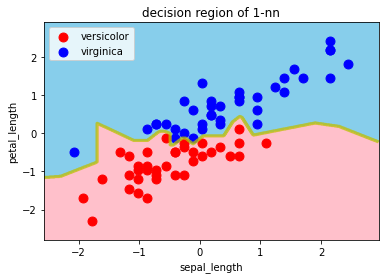

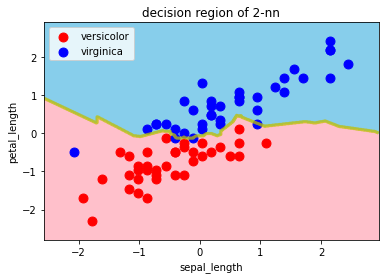

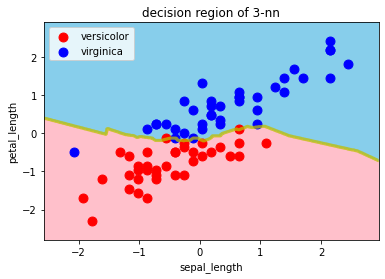

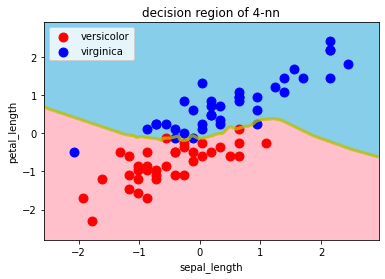

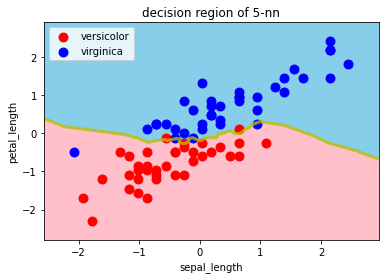

In [22]:
model_lst = [neigh_1, neigh_2, neigh_3, neigh_4, neigh_5]
for i, model in enumerate(model_lst, 1):
    decision_region(X_train_scaler, y_train, model,
                step=0.01, title='decision region of {}-nn'.format(i),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])

この例では訓練データをプロットし、どのように学習したかを見ています。一方で、検証データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。

### 手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

- [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

**《実際の問題では？》**

ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

In [23]:
# 評価値を返す
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation_value(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F_measure = f1_score(y_test, y_pred)
    return accuracy, precision, recall, F_measure

In [24]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaler, y_train)
y_pred_neigh = neigh.predict(X_test_scaler)
neigh_value = evaluation_value(y_test, y_pred_neigh)
neigh_value

(0.88, 1.0, 0.7692307692307693, 0.8695652173913044)

In [25]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train_scaler, y_train)
y_pred_lr = lr.predict(X_test_scaler)
lr_value = evaluation_value(y_test, y_pred_lr)
lr_value

(0.92, 1.0, 0.8461538461538461, 0.9166666666666666)

In [26]:
# SVM
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train_scaler, y_train)
y_pred_svc = svc.predict(X_test_scaler)
svc_value = evaluation_value(y_test, y_pred_svc)
svc_value

(0.92, 1.0, 0.8461538461538461, 0.9166666666666666)

In [27]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaler, y_train)
y_pred_tree = tree.predict(X_test_scaler)
tree_value = evaluation_value(y_test, y_pred_tree)
tree_value

(0.88, 1.0, 0.7692307692307693, 0.8695652173913044)

In [28]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train_scaler, y_train)
y_pred_forest = forest.predict(X_test_scaler)
forest_value = evaluation_value(y_test, y_pred_forest)
forest_value

(0.88, 1.0, 0.7692307692307693, 0.8695652173913044)

In [29]:
# 指標値を表にまとめる
value_lst = [neigh_value, lr_value, svc_value, tree_value, forest_value]
columns_lst = ['Accuracy', 'Precision', 'Recall', 'F-measure']
index_lst=['KNearestNeighbor', 'LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest']
result = pd.DataFrame(value_lst, columns=columns_lst, index=index_lst)
result

,Accuracy,Precision,Recall,F-measure
KNearestNeighbor,0.88,1.0,0.769231,0.869565
LogisticRegression,0.92,1.0,0.846154,0.916667
SVM,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.88,1.0,0.769231,0.869565


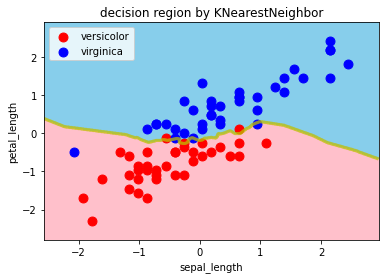

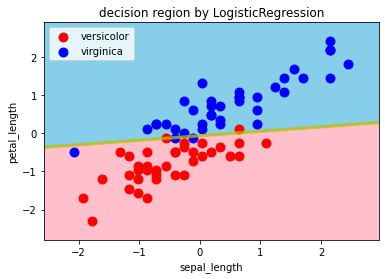

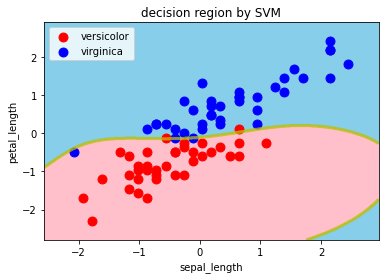

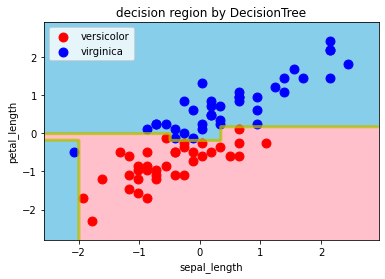

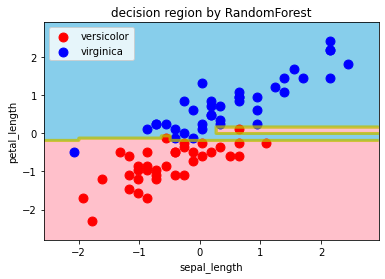

In [30]:
# 決定領域（訓練データ）
clf_lst = [neigh, lr, svc, tree, forest]
for clf, index in zip(clf_lst, index_lst):
    decision_region(X_train_scaler, y_train, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])

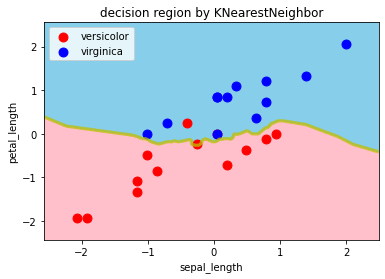

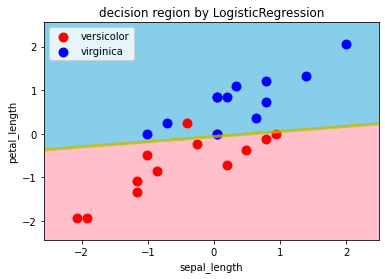

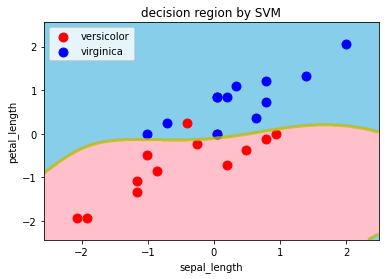

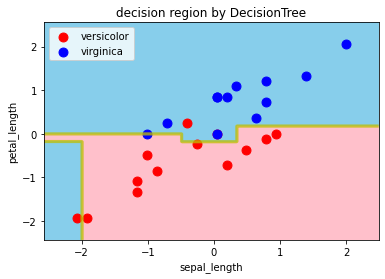

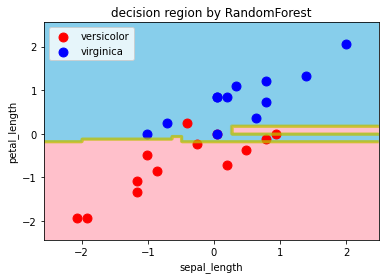

In [31]:
# 決定領域（検証データ）
clf_lst = [neigh, lr, svc, tree, forest]
for clf, index in zip(clf_lst, index_lst):
    decision_region(X_test_scaler, y_test, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])

- 指標値
    - ロジスティック回帰、　SVMが高く出ている
- 決定領域
    - 最近傍法は、訓練データの外れている値のあてはまりが悪い
    - ロジスティック回帰は直線的な領域分類
    - SVMは正と予測するものに対して円形に領域をとっている
    - 決定木、ランダムフォレストは訓練データの値を取り込むように直角で領域をとっている

## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [32]:
# 最近傍法
neigh2 = KNeighborsClassifier()
neigh2.fit(X_train, y_train)
y_pred_neigh2 = neigh2.predict(X_test)
neigh_value2 = evaluation_value(y_test, y_pred_neigh2)
neigh_value2

(0.92, 1.0, 0.8461538461538461, 0.9166666666666666)

In [33]:
# ロジスティック回帰
lr2 = LogisticRegression(solver='liblinear', random_state=0)
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)
lr_value2 = evaluation_value(y_test, y_pred_lr2)
lr_value2

(0.88, 1.0, 0.7692307692307693, 0.8695652173913044)

In [34]:
# SVM
svc2 = SVC(gamma='scale')
svc2.fit(X_train, y_train)
y_pred_svc2 = svc2.predict(X_test)
svc_value2 = evaluation_value(y_test, y_pred_svc2)
svc_value2

(0.92, 1.0, 0.8461538461538461, 0.9166666666666666)

In [35]:
# 決定木
tree2 = DecisionTreeClassifier(random_state=0)
tree2.fit(X_train, y_train)
y_pred_tree2 = tree2.predict(X_test)
tree_value2 = evaluation_value(y_test, y_pred_tree2)
tree_value2

(0.84, 0.9090909090909091, 0.7692307692307693, 0.8333333333333333)

In [36]:
# ランダムフォレスト
forest2 = RandomForestClassifier(n_estimators=10, random_state=0)
forest2.fit(X_train, y_train)
y_pred_forest2 = forest2.predict(X_test)
forest_value2 = evaluation_value(y_test, y_pred_forest2)
forest_value2

(0.84, 1.0, 0.6923076923076923, 0.8181818181818181)

In [37]:
# 指標値を表にまとめる
value_lst2 = [neigh_value2, lr_value2, svc_value2, tree_value2, forest_value2]
columns_lst = ['Accuracy', 'Precision', 'Recall', 'F-measure']
index_lst=['KNearestNeighbor', 'LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest']
result2 = pd.DataFrame(value_lst2, columns=columns_lst, index=index_lst)
result2

,Accuracy,Precision,Recall,F-measure
KNearestNeighbor,0.92,1.000000,0.846154,0.916667
LogisticRegression,0.88,1.000000,0.769231,0.869565
SVM,0.92,1.000000,0.846154,0.916667
DecisionTree,0.84,0.909091,0.769231,0.833333
RandomForest,0.84,1.000000,0.692308,0.818182


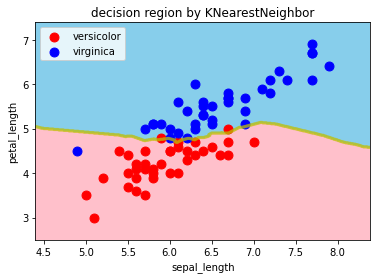

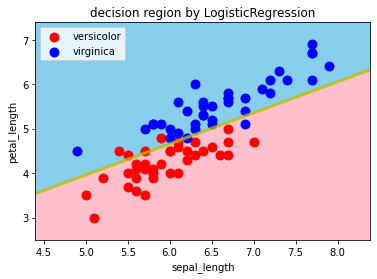

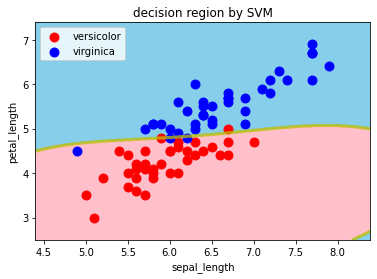

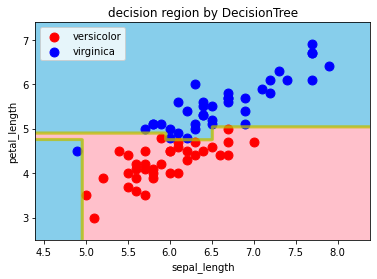

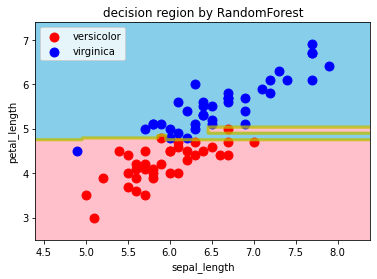

In [38]:
# 決定領域（訓練データ）
clf_lst2 = [neigh2, lr2, svc2, tree2, forest2]
for clf, index in zip(clf_lst2, index_lst):
    decision_region(X_train, y_train, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])

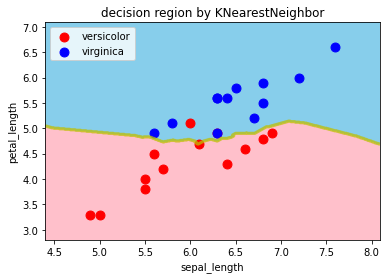

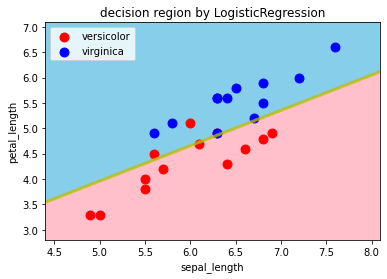

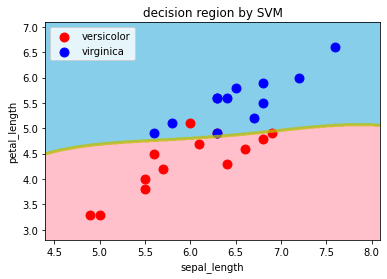

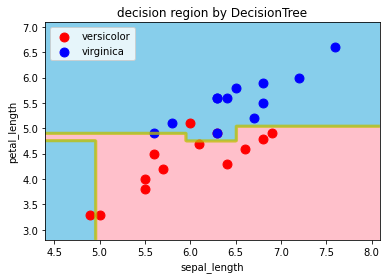

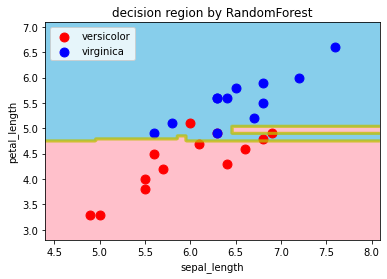

In [39]:
# 決定領域（検証データ）
clf_lst2 = [neigh2, lr2, svc2, tree2, forest2]
for clf, index in zip(clf_lst2, index_lst):
    decision_region(X_test, y_test, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['versicolor', 'virginica'])

- 指標値
    - SVMは変化なし、最近傍法は良くなっているが、その他３手法では悪化している
- 決定領域
    - 特にロジスティック回帰では、領域を分類する直線の傾きが急になり、あてはまりが悪くなっている
- 標準化の意味
    - 特徴量の平均を全て０に合わせることになり、データのまとまりが良くなり、データの比較が行いやすくなるメリットがあると想定される
    - 元データより、データのズレが少なくなり誤った結果を導く可能性がすくなるなると想定

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

**《多値になることでの変更点》**

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。
![image](https://t.gyazo.com/teams/diveintocode/6ef74d6498e42db50c8aed515a305bcb.png)
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#目的変数を全て使用
df_choice2 = df[X_choice]
Xy_all = df_choice2.iloc[:, 0:2].values
y_all = df_choice2.iloc[:, 2].values
#訓練データと検証データに分類
Xy_all_train, Xy_all_test, y_all_train, y_all_test = train_test_split(
    Xy_all, y_all, test_size=0.25, random_state=0)
#標準化
scaler2 = StandardScaler()
scaler2.fit(Xy_all_train)
Xy_all_train_scaler = scaler2.transform(Xy_all_train)
Xy_all_test_scaler = scaler2.transform(Xy_all_test)

In [41]:
# 評価値を返す(3クラスに対応するため、averageオプションを追加)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation_value2(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F_measure = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, F_measure

In [42]:
# 目的変数を3種類とるように変更
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lawngreen', 'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [43]:
# 最近傍法
neigh3 = KNeighborsClassifier()
neigh3.fit(Xy_all_train_scaler, y_all_train)
neigh_value3 = evaluation_value2(y_all_test, neigh3.predict(Xy_all_test_scaler))
neigh_value3

(0.9473684210526315,
 0.9421296296296297,
 0.9421296296296297,
 0.9421296296296297)

In [44]:
# ロジスティック回帰
lr3 = LogisticRegression(solver='liblinear', random_state=0)
lr3.fit(Xy_all_train_scaler, y_all_train)
lr_value3 = evaluation_value2(y_all_test, lr3.predict(Xy_all_test_scaler))
lr_value3

(0.7631578947368421, 0.8333333333333334, 0.8125, 0.7584541062801932)

In [45]:
# SVM
svc3 = SVC(gamma='scale')
svc3.fit(Xy_all_train_scaler, y_all_train)
svc_value3 = evaluation_value2(y_all_test, svc3.predict(Xy_all_test_scaler))
svc_value3

(0.9473684210526315,
 0.9421296296296297,
 0.9421296296296297,
 0.9421296296296297)

In [46]:
# 決定木
tree3 = DecisionTreeClassifier(random_state=0)
tree3.fit(Xy_all_train_scaler, y_all_train)
tree_value3 = evaluation_value2(y_all_test, tree3.predict(Xy_all_test_scaler))
tree_value3

(0.8947368421052632,
 0.8842592592592592,
 0.8842592592592592,
 0.8842592592592592)

In [47]:
# ランダムフォレスト
forest3 = RandomForestClassifier(n_estimators=10, random_state=0)
forest3.fit(Xy_all_train_scaler, y_all_train)
forest_value3 = evaluation_value2(y_all_test, forest3.predict(Xy_all_test_scaler))
forest_value3

(0.8947368421052632,
 0.8968253968253969,
 0.8680555555555555,
 0.8774509803921569)

In [48]:
# 指標値を表にまとめる
value_lst3 = [neigh_value3, lr_value3, svc_value3, tree_value3, forest_value3]
columns_lst = ['Accuracy', 'Precision', 'Recall', 'F-measure']
index_lst=['KNearestNeighbor', 'LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest']
result3 = pd.DataFrame(value_lst3, columns=columns_lst, index=index_lst)
result3

,Accuracy,Precision,Recall,F-measure
KNearestNeighbor,0.947368,0.942130,0.942130,0.942130
LogisticRegression,0.763158,0.833333,0.812500,0.758454
SVM,0.947368,0.942130,0.942130,0.942130
DecisionTree,0.894737,0.884259,0.884259,0.884259
RandomForest,0.894737,0.896825,0.868056,0.877451


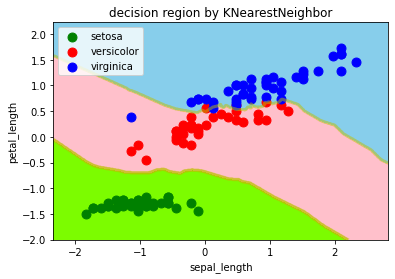

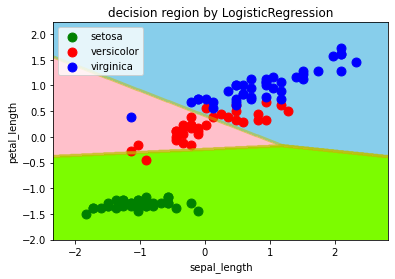

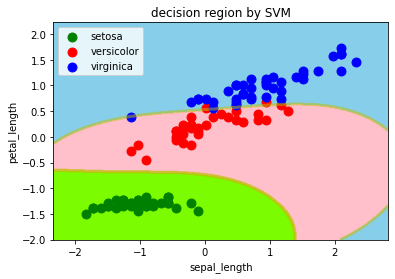

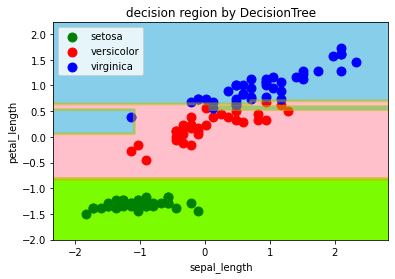

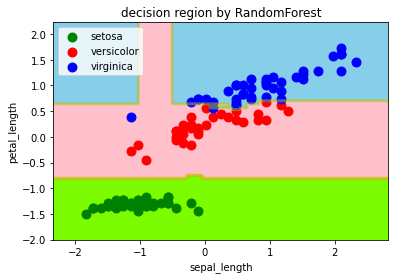

In [49]:
# 決定領域（訓練データ）
clf_lst3 = [neigh3, lr3, svc3, tree3, forest3]
for clf, index in zip(clf_lst3, index_lst):
    decision_region2(Xy_all_train_scaler, y_all_train, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['setosa', 'versicolor', 'virginica'])

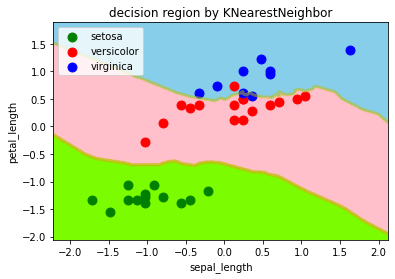

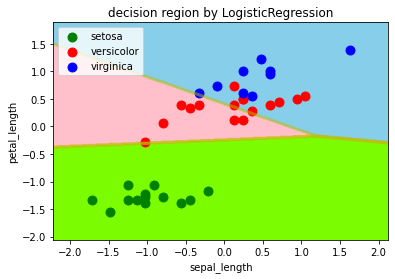

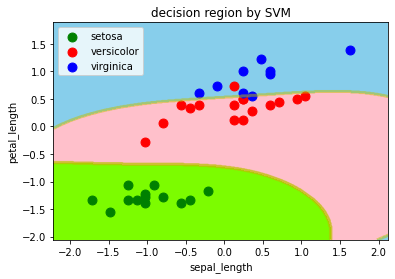

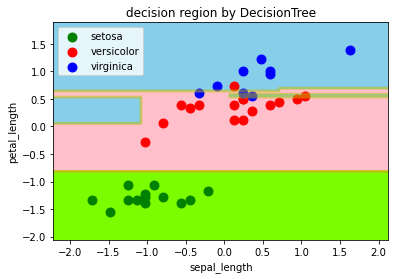

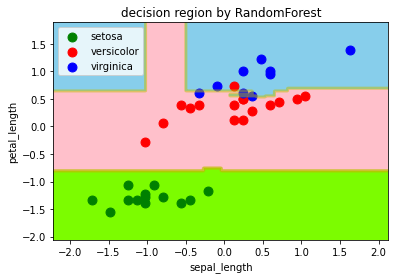

In [50]:
# 決定領域（検証データ）
clf_lst3 = [neigh3, lr3, svc3, tree3, forest3]
for clf, index in zip(clf_lst3, index_lst):
    decision_region2(Xy_all_test_scaler, y_all_test, clf,
                step=0.01, title='decision region by {}'.format(index),
                xlabel='sepal_length', ylabel='petal_length',
                target_names=['setosa', 'versicolor', 'virginica'])

最近傍法、SVMの指標が最も良くなっている。
目的変数が２つの時と比較して、ロジスティック回帰の指標が大幅に悪化している